<h2>K Means</h2>
<p>Implement K-Means with data generating by myself(mixture of 3 Guassians)</p>

In [70]:
import numpy as np
pi = [0.2,0.5,0.3]
means = [[0,0],[3,0],[0,3]]
covariance = np.matrix([[1,0],[0,1]])
obervations = list()

for i in range(0,500):
    choice_pi = np.random.choice([0,1,2],1,p = pi)[0]
    mean = means[choice_pi]
    obervations.append(np.random.multivariate_normal(mean,covariance))

In [71]:
def distance_cal(point,center): ##[x,y] correct
    return pow(point[1]-center[1],2)+pow(point[0]-center[0],2)

def best_c(point,centers): #correct
    d = dict()
    for c in range(len(centers)):
        d[str(c)] = distance_cal(point,centers[c])
    return sorted(d,key=lambda x: d[x])[0]

def mean_cal(l):
    x = 0
    y = 0
    for k,v in l:
        x+=k
        y+=v
    return [x/len(l),y/len(l)]

In [129]:
object_fun_value = dict({'2':[],'3':[],'4':[],'5':[]})
knn3_final=0
knn5_final=0

for k in [2,3,4,5]:
    knn_means=[]
    cluster = dict()
    
    #initial central point
    for n in range(0,k):
        knn_means.append(np.random.rand(2))
        
        
    for i in range(0,20):
        for n in range(0,k):cluster[str(n)]=[]
        #into each cluster 
        for observation in obervations:
            n = best_c(observation,knn_means)
            cluster[n].append(observation)
        
        #update mean
        for n in range(0,k):
            knn_means[n] = mean_cal(cluster[str(n)])
        
        #calculate L
        L=0
        for n in range(0,k):
            for each in cluster[str(n)]:
                L += distance_cal(each,knn_means[n]) 
        object_fun_value[str(k)].append(L)
        
        if (k==3 and i == 19):
            knn3_final = cluster
        if (k==5 and i == 19):
            knn5_final = cluster

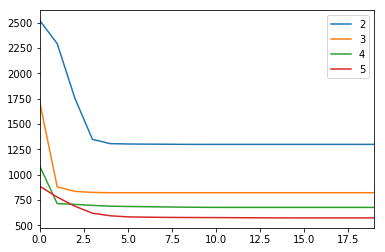

In [130]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
pd.DataFrame(object_fun_value).plot()

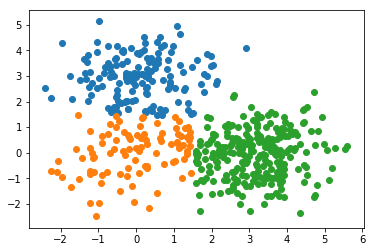

In [131]:
def seperate_xy(l):
    x=[]
    y=[]
    for k,v in l:
        x.append(k)
        y.append(v)
    return x,y

for i in range(0,3):
    x,y = seperate_xy(knn3_final[str(i)])
    plt.scatter(x,y)

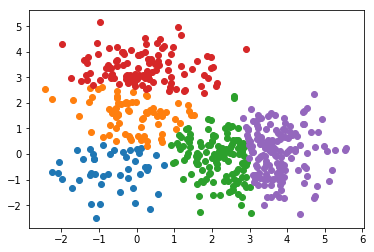

In [132]:
for i in range(0,5):
    x,y = seperate_xy(knn5_final[str(i)])
    plt.scatter(x,y)